In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

db = pd.read_csv('DiZyme.csv')
di2 = {'TMB':1.0, 'H2O2':2.0, 'ABTS': 3.0, 'OPD': 4.0, 'DAB':5.0, 'BA':6.0}
db['Subtype'].replace(di2, inplace=True)
x = db.loc[:,'Syngony':'volume'].values
y = db.loc[:,'Kcat'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_train =np.log10(y_train)
y_test = np.log10(y_test)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_leaf_nodes=80, max_depth=80, min_samples_leaf=3, max_features='auto', splitter='best')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

Accuracy of Model with Cross Validation is: -1.0881068742618574
r2_score: 0.4508907047689025
Mean Absolute Error: 1.1381405849440767
Mean Squared Error: 2.8174839827356153
Root Mean Squared Error: 1.6785362619662452
DecisionTreeRegressor(max_depth=80, max_features='auto', max_leaf_nodes=80,
                      min_samples_leaf=3)
r_score: 0.6714839571939917


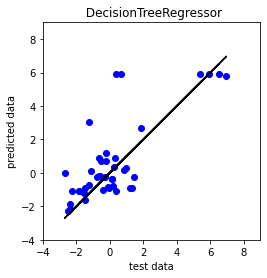

In [8]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                        scoring='neg_mean_absolute_error')
print("Accuracy of Model with Cross Validation is:",accuracy.mean())
#metrics

from sklearn import metrics
print('r2_score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(regressor)
print('r_score:', np.sqrt(metrics.r2_score(y_test, y_pred)))
plt.scatter(y_test, y_pred, color = 'blue')
plt.plot(y_test, y_test, color = 'black')
plt.title(' DecisionTreeRegressor')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(-4, 9)
plt.ylim(-4, 9)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

db = pd.read_csv('DiZymePred.csv')
di2 = {'TMB':1.0, 'H2O2':2.0, 'ABTS': 3.0, 'OPD': 4.0, 'DAB':5.0, 'BA':6.0}
db['Subtype'].replace(di2, inplace=True)
x = db.loc[:,'Syngony':'Ccat'].values
y = db.loc[:,'Km'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_train =np.log10(y_train)
y_test = np.log10(y_test)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_leaf_nodes=80, max_depth=80, min_samples_leaf=3, max_features='auto', splitter='best')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

Accuracy of Model with Cross Validation is: -0.7805864940181847
r2_score: 0.3392230208531306
Mean Absolute Error: 0.7368634604304419
Mean Squared Error: 1.087247183298322
Root Mean Squared Error: 1.042711457354489
DecisionTreeRegressor(max_depth=80, max_features='auto', max_leaf_nodes=80,
                      min_samples_leaf=3)
r_score: 0.5824285542906792


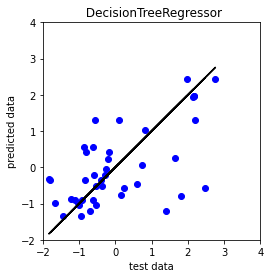

In [6]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                        scoring='neg_mean_absolute_error')
print("Accuracy of Model with Cross Validation is:",accuracy.mean())
#metrics

from sklearn import metrics
print('r2_score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(regressor)
print('r_score:', np.sqrt(metrics.r2_score(y_test, y_pred)))
plt.scatter(y_test, y_pred, color = 'blue')
plt.plot(y_test, y_test, color = 'black')
plt.title(' DecisionTreeRegressor')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()